In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.switch_backend("Agg")
%matplotlib inline

In [3]:
spotify_history = pd.read_csv("spotify_history.csv")
data_dictionary = pd.read_csv("spotify_data_dictionary.csv")

spotify_history.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
spotify_history['ts'] = pd.to_datetime(spotify_history['ts'])

spotify_history.dtypes

spotify_track_uri            object
ts                   datetime64[ns]
platform                     object
ms_played                     int64
track_name                   object
artist_name                  object
album_name                   object
reason_start                 object
reason_end                   object
shuffle                        bool
skipped                        bool
dtype: object

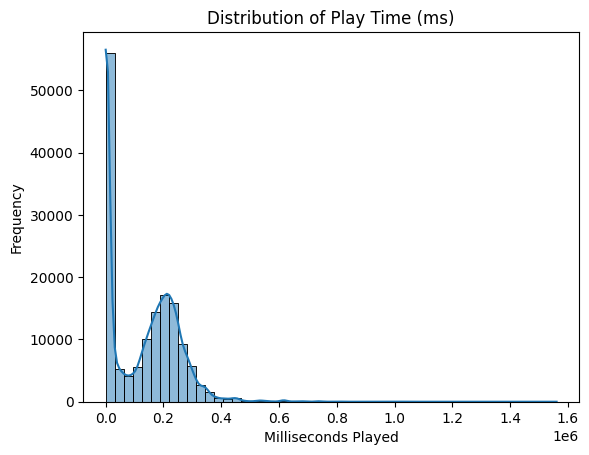

In [5]:
sns.histplot(spotify_history["ms_played"], bins = 50, kde = True)
plt.title("Distribution of Play Time (ms)")
plt.xlabel("Milliseconds Played")
plt.ylabel("Frequency")
plt.show()

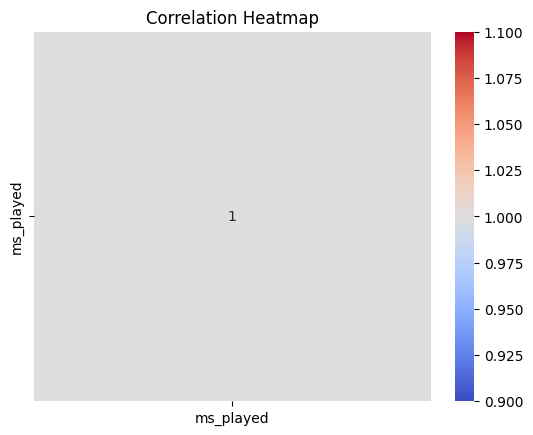

In [6]:
numeric_df = spotify_history.select_dtypes(include = [np.number])
sns.heatmap(numeric_df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
spotify_history["hour"] = spotify_history["ts"].dt.hour

spotify_history[["ts", "hour"]].head()

,ts,hour
0,2013-07-08 02:44:34,2
1,2013-07-08 02:45:37,2
2,2013-07-08 02:50:24,2
3,2013-07-08 02:52:40,2
4,2013-07-08 03:17:52,3


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

features = ["ms_played", "hour", "shuffle"]
X = spotify_history[features]
y = spotify_history["skipped"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9201254504203924

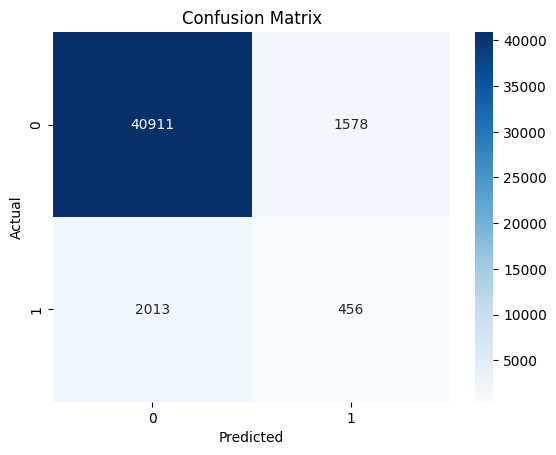

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()